In [2]:
import numpy as np
import matplotlib.pyplot as plt

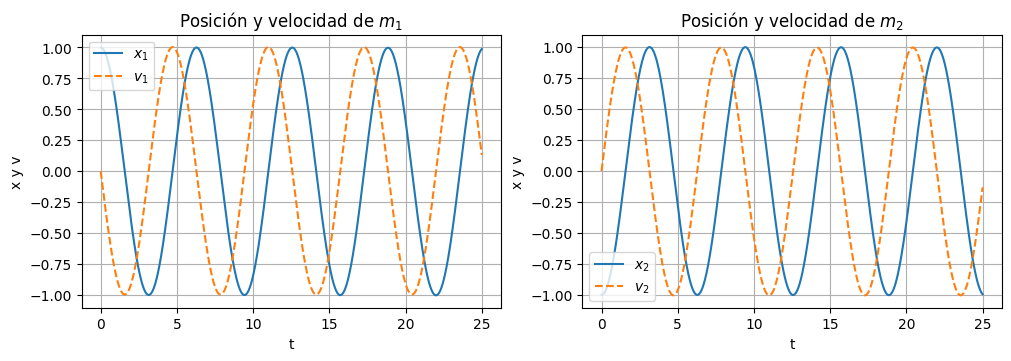

In [4]:
dx1 = lambda t, x1, v1: v1
dv1 = lambda t, x1, x2, v1, v2: -(k1/m1) * x1 - (kc/m1) * (x1 - x2)
dx2= lambda t, x2, v2: v2
dv2 = lambda t, x1, x2, v1, v2: -(kc/m2) * (x2 - x1) - (k2/m2) * x2

t0 = 0
tf = 25
x01 = 1
x02 = -1
v01 = 0
v02 = 0
h = 1e-2

n = int((tf-t0)/h)

t_v = np.linspace(t0, tf, n+1)
x1_v = np.zeros(n+1)
v1_v = np.zeros(n+1)
x2_v = np.zeros(n+1)
v2_v = np.zeros(n+1)
x1_v[0] = x01
v1_v[0] = v01
x2_v[0] = x02
v2_v[0] = v02

k1 = 2
k2 = 2
kc = 0.5
m1 = 1
m2 = 1

for i in range(n):
    k1 = h*dx1(t_v[i], x1_v[i], v1_v[i])
    l1 = h*dv1(t_v[i], x1_v[i], x2_v[i], v1_v[i], v2_v[i])
    h1 = h*dx2(t_v[i], x2_v[i], v2_v[i])
    ñ1 = h*dv2(t_v[i], x1_v[i], x2_v[i], v1_v[i], v2_v[i])
    
    k2 = h*dx1(t_v[i] + (h/2), x1_v[i] + (k1/2), v1_v[i] + (l1/2))
    l2 = h*dv1(t_v[i] + (h/2), x1_v[i] + (k1/2), x2_v[i] + (h1/2), v1_v[i] + (l1/2), v2_v[i] + (ñ1/2))
    h2 = h*dx2(t_v[i] + (h/2), x2_v[i] + (h1/2), v2_v[i] + (ñ1/2))
    ñ2 = h*dv2(t_v[i] + (h/2), x1_v[i] + (k1/2), x2_v[i] + (h1/2), v1_v[i] + (l1/2), v2_v[i] + (ñ1/2))

    x1_v[i+1] = x1_v[i] + k2
    v1_v[i+1] = v1_v[i] + l2
    x2_v[i+1] = x2_v[i] + h2
    v2_v[i+1] = v2_v[i] + ñ2

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, x1_v,)
ax[0].plot(t_v, v1_v, ls = "--")
ax[0].set_title("Posición y velocidad de $m_1$")
ax[0].set_xlabel("t")
ax[0].set_ylabel("x y v")
ax[0].legend(["$x_1$", "$v_1$"])
ax[0].grid()

ax[1].plot(t_v, x2_v,)
ax[1].plot(t_v, v2_v, ls = "--")
ax[1].set_title("Posición y velocidad de $m_2$")
ax[1].set_xlabel("t")
ax[1].set_ylabel("x y v")
ax[1].legend(["$x_2$", "$v_2$"])
ax[1].grid()

plt.show()